In [11]:
# --- Import libraries ---
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [12]:
# --- Load CSV from Google Drive ---
# دانلود فایل داده از گوگل درایو
#url = 'https://drive.google.com/uc?id=1EIYVuHQV6XptTb03oiKYBIgtLb6t3wc8'
url='https://drive.google.com/uc?id=1Ln3clCUDUEjK2TyJvMoAar4Rz226Gsjs'
df = pd.read_csv(url)

#Outliers

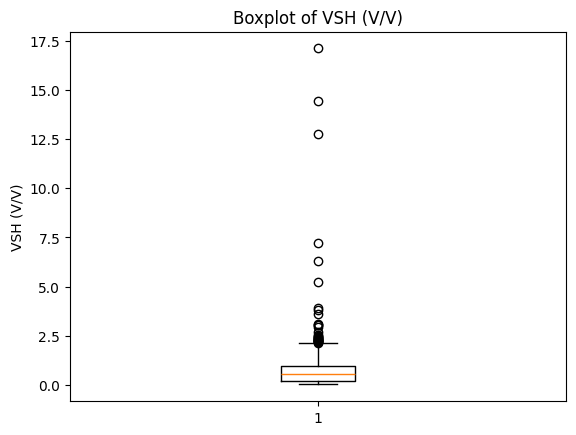

--------------------------------------------------
With outliers
n = 4891, p = 1
RSE = 677.260
R²  = 0.065


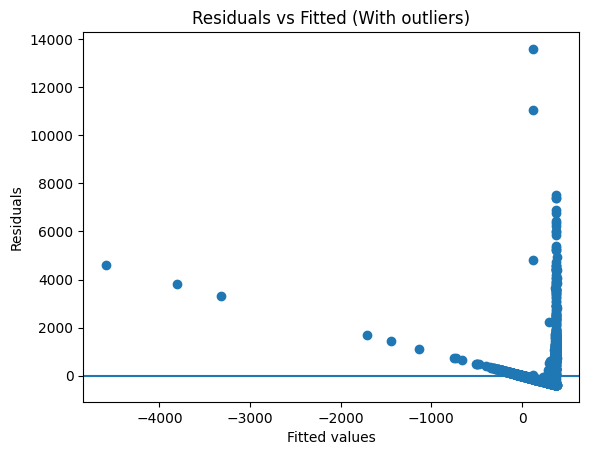

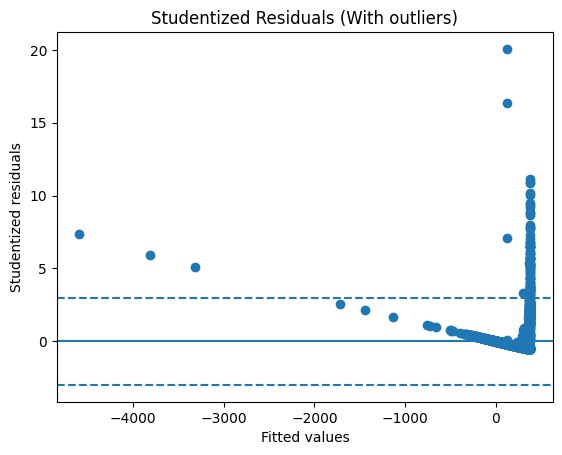

--------------------------------------------------
After removing outliers
n = 4807, p = 1
RSE = 327.509
R²  = 0.160


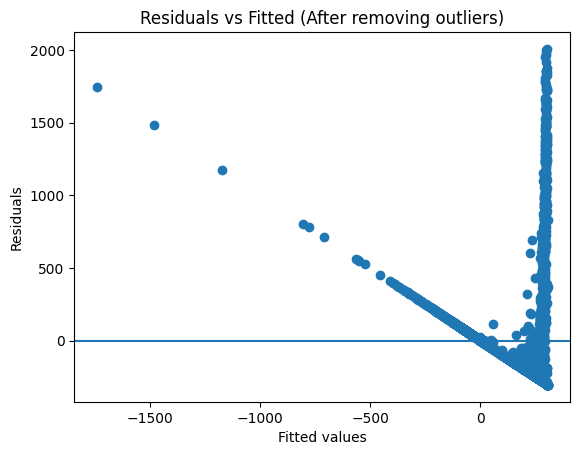

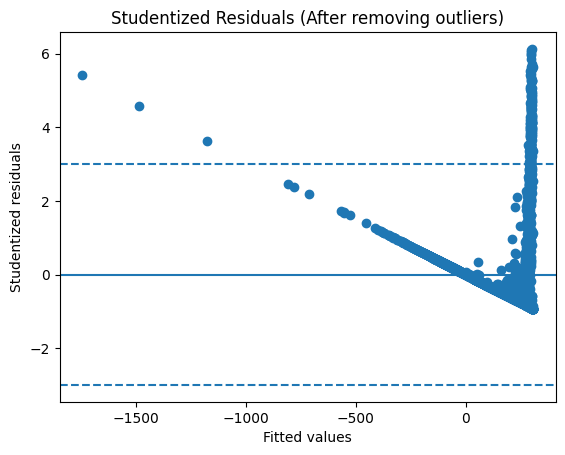

In [13]:
# -------------------------------------------------
# Load data
# -------------------------------------------------

y = df["KLOGH (MD)"]

# Choose one feature at a time
feature = "VSH (V/V)"   # change to "VSH (V/V)" for second example
x = df[feature]


# --- Clean predictors ---
x = x.replace([np.inf, -np.inf], np.nan)
x = x.dropna()
y = y.loc[x.index] # همسان کردن index

# -------------------------------------------------
# 1. Boxplot (EDA-based outlier detection)
# -------------------------------------------------
plt.figure()
plt.boxplot(x.dropna())
plt.title(f"Boxplot of {feature}")
plt.ylabel(feature)
plt.show()

# -------------------------------------------------
# Helper function: simple linear regression diagnostics
# -------------------------------------------------
def run_simple_regression(x, y, title_suffix=""):
    X = sm.add_constant(x)
    model = sm.OLS(y, X).fit()

    n = int(model.nobs)
    p = X.shape[1] - 1

    RSS = np.sum(model.resid ** 2)
    RSE = np.sqrt(RSS / (n - p - 1))
    R2 = model.rsquared

    print("--------------------------------------------------")
    print(title_suffix)
    print(f"n = {n}, p = {p}")
    print(f"RSE = {RSE:.3f}")
    print(f"R²  = {R2:.3f}")

    # Residual plot
    plt.figure()
    plt.scatter(model.fittedvalues, model.resid)
    plt.axhline(0)
    plt.xlabel("Fitted values")
    plt.ylabel("Residuals")
    plt.title(f"Residuals vs Fitted ({title_suffix})")
    plt.show()

    # Studentized residuals
    infl = model.get_influence()
    studentized_resid = infl.resid_studentized_internal

    plt.figure()
    plt.scatter(model.fittedvalues, studentized_resid)
    plt.axhline(0)
    plt.axhline(3, linestyle="--")
    plt.axhline(-3, linestyle="--")
    plt.xlabel("Fitted values")
    plt.ylabel("Studentized residuals")
    plt.title(f"Studentized Residuals ({title_suffix})")
    plt.show()

    return model, studentized_resid


# -------------------------------------------------
# 2. Regression with all data
# -------------------------------------------------
model_full, stud_resid_full = run_simple_regression(
    x, y, title_suffix="With outliers"
)

# -------------------------------------------------
# 3. Remove outliers using studentized residuals
# |r_i| > 3
# -------------------------------------------------
mask = np.abs(stud_resid_full) <= 3

x_clean = x[mask]
y_clean = y[mask]

# -------------------------------------------------
# 4. Regression after outlier removal
# -------------------------------------------------
model_clean, stud_resid_clean = run_simple_regression(
    x_clean, y_clean, title_suffix="After removing outliers"
)

#High Leverage Points